In [3]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("cryptonews.csv")

Kích thước dataset: (31037, 12)

Các cột dữ liệu: ['date', 'sentiment', 'source', 'subject', 'text', 'title', 'url', 'sentiment_class', 'polarity', 'subjectivity', 'title_len', 'text_len']

Kiểu dữ liệu:
 date                object
sentiment           object
source              object
subject             object
text                object
title               object
url                 object
sentiment_class     object
polarity           float64
subjectivity       float64
title_len            int64
text_len             int64
dtype: object

Số lượng giá trị thiếu:
 date               0
sentiment          0
source             0
subject            0
text               0
title              0
url                0
sentiment_class    0
polarity           0
subjectivity       0
title_len          0
text_len           0
dtype: int64

Phân bố sentiment:
 positive    13964
neutral     10555
negative     6518
Name: sentiment_class, dtype: int64


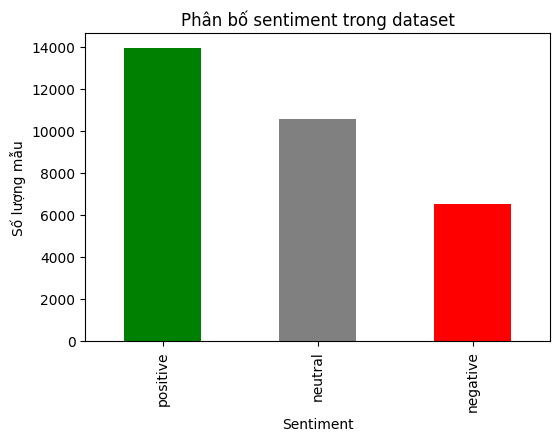


Độ dài trung bình:
Title: 11.656957824532011 từ
Text: 22.241647066404614 từ


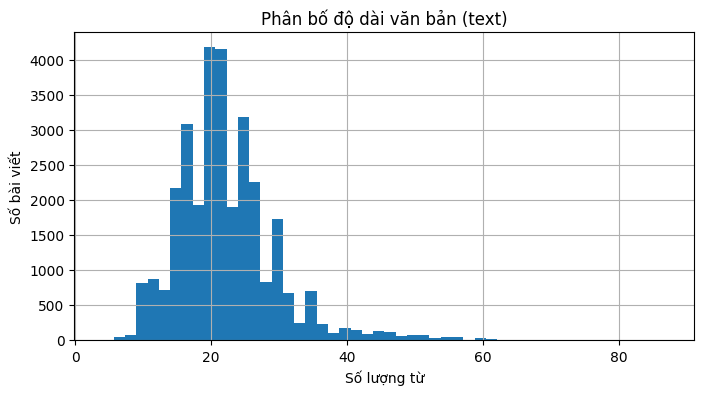

In [10]:
print("Kích thước dataset:", df.shape)
print("\nCác cột dữ liệu:", df.columns.tolist())
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\nSố lượng giá trị thiếu:\n", df.isnull().sum())

# === 2. Parse sentiment ===
df["sentiment_class"] = df["sentiment"].apply(lambda x: ast.literal_eval(x)["class"])
df["polarity"] = df["sentiment"].apply(lambda x: ast.literal_eval(x)["polarity"])
df["subjectivity"] = df["sentiment"].apply(lambda x: ast.literal_eval(x)["subjectivity"])

# === 3. Phân bố sentiment ===
print("\nPhân bố sentiment:\n", df["sentiment_class"].value_counts())

df["sentiment_class"].value_counts().plot(
    kind="bar", color=["green", "gray", "red"], figsize=(6,4)
)
plt.title("Phân bố sentiment trong dataset")
plt.xlabel("Sentiment")
plt.ylabel("Số lượng mẫu")
plt.show()

# === 4. Độ dài văn bản (title & text) ===
df["title_len"] = df["title"].apply(lambda x: len(str(x).split()))
df["text_len"] = df["text"].apply(lambda x: len(str(x).split()))

print("\nĐộ dài trung bình:")
print("Title:", df["title_len"].mean(), "từ")
print("Text:", df["text_len"].mean(), "từ")

# Vẽ histogram độ dài text
plt.figure(figsize=(8,4))
df["text_len"].hist(bins=50)
plt.title("Phân bố độ dài văn bản (text)")
plt.xlabel("Số lượng từ")
plt.ylabel("Số bài viết")
plt.show()

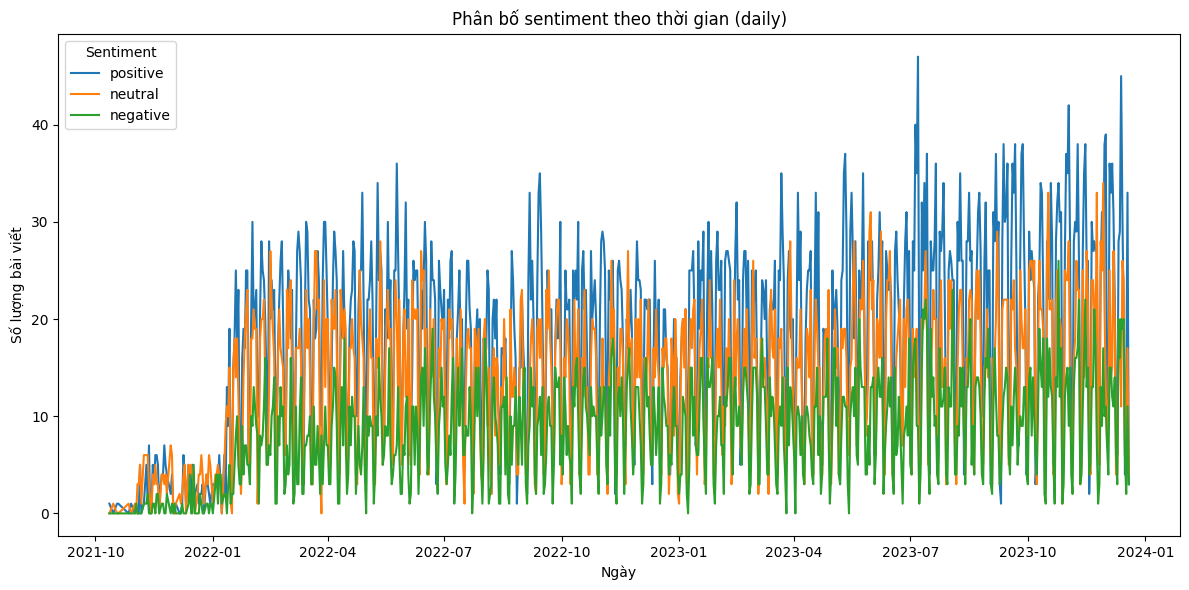

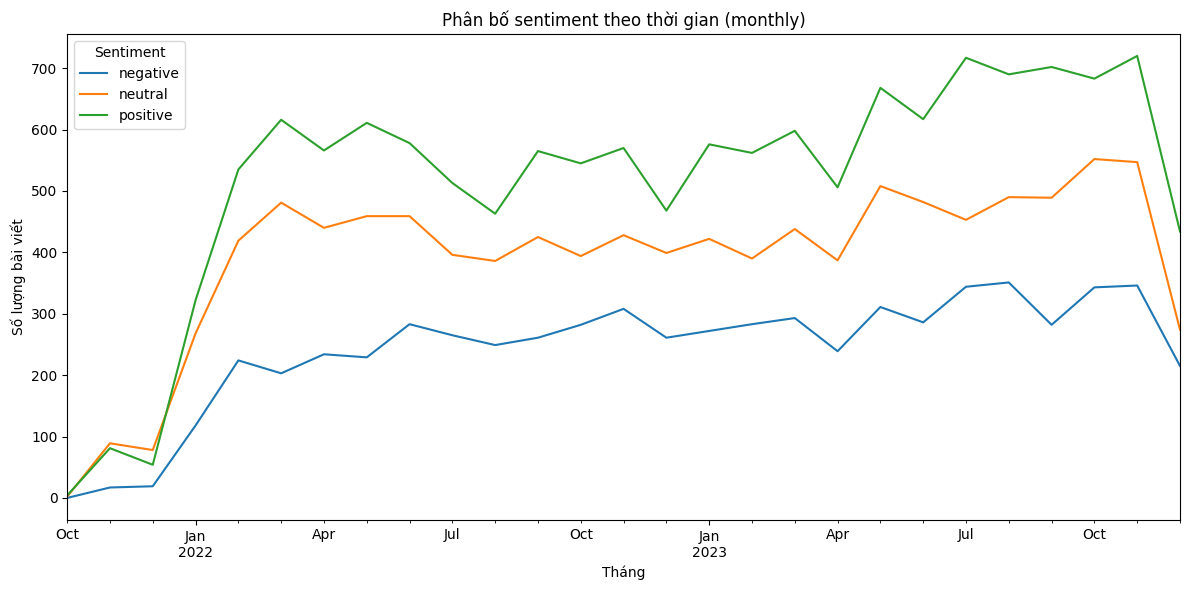

In [11]:
df["sentiment_class"] = df["sentiment"].apply(lambda x: ast.literal_eval(x)["class"])

# Chuyển cột date sang datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Nhóm theo ngày (hoặc có thể đổi thành 'M' để gom theo tháng)
sentiment_over_time = df.groupby([df["date"].dt.date, "sentiment_class"]).size().unstack(fill_value=0)

# Vẽ biểu đồ xu hướng sentiment theo thời gian
plt.figure(figsize=(12,6))
for sentiment in ["positive", "neutral", "negative"]:
    plt.plot(sentiment_over_time.index, sentiment_over_time[sentiment], label=sentiment)

plt.title("Phân bố sentiment theo thời gian (daily)")
plt.xlabel("Ngày")
plt.ylabel("Số lượng bài viết")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# Nếu muốn phân tích theo tháng
sentiment_monthly = df.groupby([df["date"].dt.to_period("M"), "sentiment_class"]).size().unstack(fill_value=0)

sentiment_monthly.plot(kind="line", figsize=(12,6))
plt.title("Phân bố sentiment theo thời gian (monthly)")
plt.xlabel("Tháng")
plt.ylabel("Số lượng bài viết")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

sentiment_class   negative    neutral   positive
subject                                         
bitcoin          22.191011  32.694623  45.114366
altcoin          22.116836  33.283035  44.600129
blockchain       18.698719  35.785231  45.516050
ethereum         19.744943  37.027265  43.227792
nft              19.895629  33.007175  47.097195
defi             19.382835  36.065574  44.551591


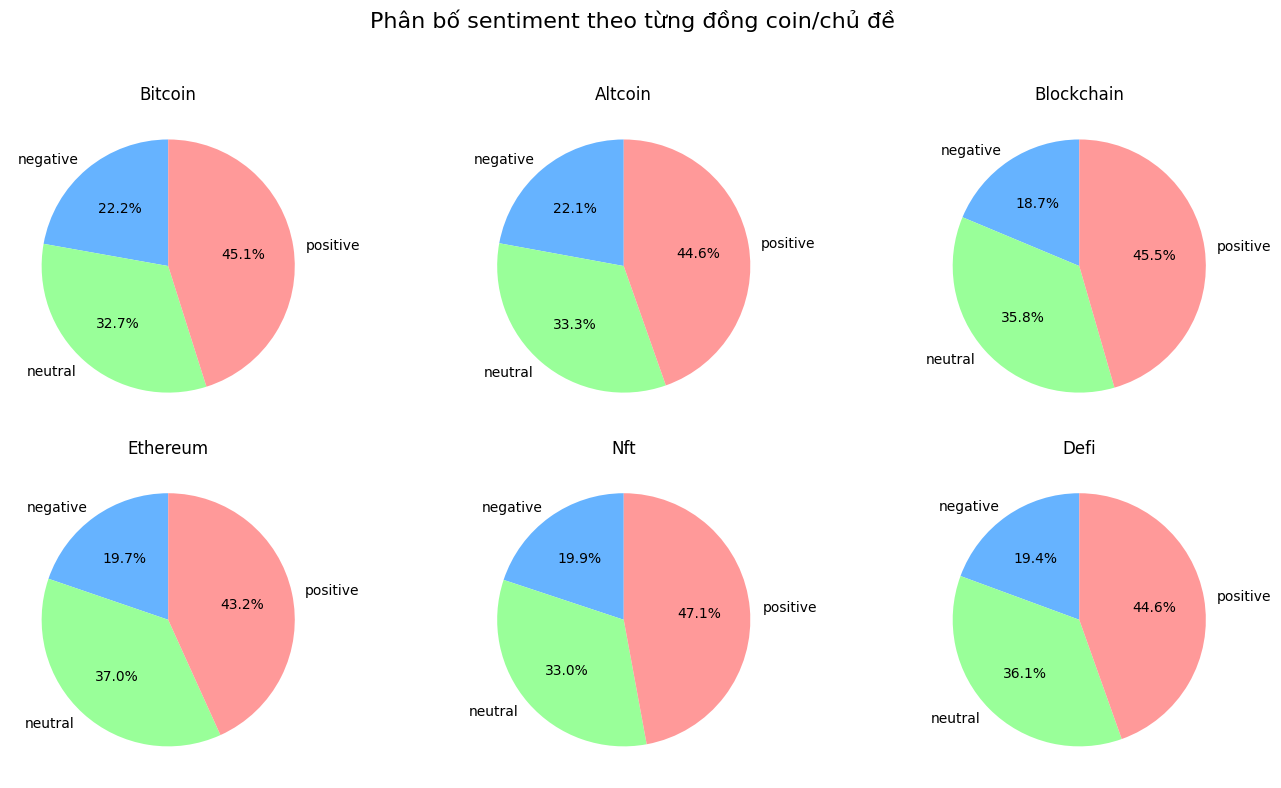

In [ ]:
df["sentiment_class"] = df["sentiment"].apply(lambda x: ast.literal_eval(x)["class"])
sentiment_by_subject = df.groupby(["subject", "sentiment_class"]).size().unstack(fill_value=0)
sentiment_by_subject_percent = sentiment_by_subject.div(sentiment_by_subject.sum(axis=1), axis=0) * 100
top_subjects = ["bitcoin", "altcoin", "blockchain", "ethereum", "nft", "defi"]
result = sentiment_by_subject_percent.loc[top_subjects]
data_plot = sentiment_by_subject_percent.loc[top_subjects]

print(result)
# Vẽ biểu đồ tròn cho từng coin
ig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, subject in enumerate(top_subjects):
    sizes = sentiment_by_subject.loc[subject]
    axes[i].pie(
        sizes,
        labels=sizes.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#66b3ff", "#99ff99", "#ff9999"]  # neutral, positive, negative
    )
    axes[i].set_title(subject.capitalize())

plt.suptitle("Phân bố sentiment theo từng đồng coin/chủ đề", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()